<a href="https://colab.research.google.com/github/ARYAA98/Youtube-Data-Analysis/blob/main/YoutubeDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This project uses the YouTube Data API to collect information on trending videos
in the United States. It retrieves details such as video titles, descriptions,
publish dates, view counts, likes, comments, and more. The collected data is
saved into a CSV file for further analysis.

Main Steps:
1. Use the YouTube Data API to fetch 'Most Popular' videos.
2. Extract relevant data including video statistics and metadata.
3. Save the data to a CSV file for future use.

Requirements:
- API Key for YouTube Data API
- Pandas library for data manipulation


In [4]:
import pandas as pd
from googleapiclient.discovery import build

# replace with your own API key
API_KEY = 'Your key here'


def get_trending_videos(api_key, max_results=200):
    # build the youtube service
    youtube = build('youtube', 'v3', developerKey=api_key)

    # initialize the list to hold video details
    videos = []

    # fetch the most popular videos
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        chart='mostPopular',
        regionCode='US',
        maxResults=50
    )

    # paginate through the results if max_results > 50
    while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count': item['statistics'].get('dislikeCount', 0),
                'favorite_count': item['statistics'].get('favoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)
            }
            videos.append(video_details)

        # get the next page token
        request = youtube.videos().list_next(request, response)

    return videos[:max_results]

def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def main():
    trending_videos = get_trending_videos(API_KEY)
    filename = 'trending_videos1.csv'
    save_to_csv(trending_videos, filename)
    print(f'Trending videos saved to {filename}')

if __name__ == '__main__':
    main()

Trending videos saved to trending_videos1.csv


In [2]:
from googleapiclient.discovery import build

API_KEY = ''Your key here'
youtube = build('youtube', 'v3', developerKey=API_KEY)

def get_category_mapping():
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode='US'
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

# get the category mapping
category_mapping = get_category_mapping()
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [7]:
# Importing the pandas library for data manipulation
import pandas as pd

# Read the CSV file into a DataFrame
trending_videos = pd.read_csv('trending_videos.csv')

# Display the first few rows of the DataFrame
print(trending_videos.head())

      video_id                                              title  \
0  ZaK9Wi5ho0o  Eminem - Temporary (feat. Skylar Grey) [Offici...   
1  34_vkNV6wrU          Tee Grizzley - Robbery 8 [Official Video]   
2  IpffX4rqGAA          Lil Durk - Monitoring Me (Official Video)   
3  5tzArtz1VBU  Porto vs. Man. United: Extended Highlights | U...   
4  KYMqyTINul8  10 Things You SHOULD Be Buying at Costco in Oc...   

                                         description          published_at  \
0  Eminem - Temporary (feat. Skylar Grey) \nListe...  2024-10-03T17:00:22Z   
1  The official video for Tee Grizzley's "Robbery...  2024-10-04T04:00:34Z   
2  "Monitoring Me", Out Now Off Of Lil Durk's Upc...  2024-10-04T04:00:26Z   
3  Man. United disappointed in the opener against...  2024-10-03T21:40:38Z   
4  So many people have shopped at Costco but not ...  2024-10-04T14:32:21Z   

                 channel_id               channel_title  category_id  \
0  UC20vb-R_px4CguHzzBPhoyQ                 

In [8]:
trending_videos.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,ZaK9Wi5ho0o,Eminem - Temporary (feat. Skylar Grey) [Offici...,Eminem - Temporary (feat. Skylar Grey) \nListe...,2024-10-03T17:00:22Z,UC20vb-R_px4CguHzzBPhoyQ,EminemVEVO,10,"['Eminem', 'Skylar Grey', 'Shady/Aftermath/Int...",PT5M3S,hd,True,6823282,552263,0,0,34248
1,34_vkNV6wrU,Tee Grizzley - Robbery 8 [Official Video],"The official video for Tee Grizzley's ""Robbery...",2024-10-04T04:00:34Z,UCz015ho6P0Ooo7IZFyQU7fw,Tee Grizzley,10,"['Tee Grizzley', 'Hip Hop', 'Detroit', 'TeeGri...",PT8M45S,hd,False,759887,56005,0,0,4123
2,IpffX4rqGAA,Lil Durk - Monitoring Me (Official Video),"""Monitoring Me"", Out Now Off Of Lil Durk's Upc...",2024-10-04T04:00:26Z,UCaxOQZrF5llUMp-JjesUz1A,Lil Durk,10,"['lil durk', 'lil durk music', 'lil durk music...",PT2M25S,hd,False,789263,58438,0,0,3844
3,5tzArtz1VBU,Porto vs. Man. United: Extended Highlights | U...,Man. United disappointed in the opener against...,2024-10-03T21:40:38Z,UCf8YPuOWXlpTS7RibaJlP4g,CBS Sports Golazo - Europe,17,[],PT11M17S,hd,False,460685,4654,0,0,1010
4,KYMqyTINul8,10 Things You SHOULD Be Buying at Costco in Oc...,So many people have shopped at Costco but not ...,2024-10-04T14:32:21Z,UC5Qbo0AR3CwpmEq751BIy0g,The Deal Guy,28,"['the deal guy', 'costco', 'costco store', 'co...",PT20M49S,hd,True,475380,29261,0,0,556


In [9]:
# check for missing values
missing_values = trending_videos.isnull().sum()

# display data types
data_types = trending_videos.dtypes

missing_values, data_types

(video_id          0
 title             0
 description       1
 published_at      0
 channel_id        0
 channel_title     0
 category_id       0
 tags              0
 duration          0
 definition        0
 caption           0
 view_count        0
 like_count        0
 dislike_count     0
 favorite_count    0
 comment_count     0
 dtype: int64,
 video_id          object
 title             object
 description       object
 published_at      object
 channel_id        object
 channel_title     object
 category_id        int64
 tags              object
 duration          object
 definition        object
 caption             bool
 view_count         int64
 like_count         int64
 dislike_count      int64
 favorite_count     int64
 comment_count      int64
 dtype: object)

### Data Cleaning

The data have 1 missing value in the column " description". This needs to be handled. The datatype for the column "published" should be in datetime format and the column "tags" also needs a change

In [10]:
# fill missing descriptions with "No description"
trending_videos['description'].fillna('No description', inplace=True)

# convert `published_at` to datetime
trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'])

# convert tags from string representation of list to actual list
trending_videos['tags'] = trending_videos['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

<ipython-input-10-70c6bb79aa32>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trending_videos['description'].fillna('No description', inplace=True)


### Descriptive Statistics

In [11]:
# descriptive statistics
descriptive_stats = trending_videos[['view_count', 'like_count', 'dislike_count', 'comment_count']].describe()

descriptive_stats

,view_count,like_count,dislike_count,comment_count
count,2.000000e+02,2.000000e+02,200.0,200.000000
mean,1.920133e+06,7.413168e+04,0.0,4865.355000
std,5.756778e+06,2.000695e+05,0.0,8239.192534
min,9.987500e+04,8.040000e+02,0.0,0.000000
25%,4.038360e+05,1.134325e+04,0.0,1080.750000
50%,7.513970e+05,2.802900e+04,0.0,2457.500000
75%,1.605307e+06,6.191150e+04,0.0,4914.250000
max,7.509173e+07,2.456787e+06,0.0,84268.000000


## View Count , Like Count and Comment Count Distribution

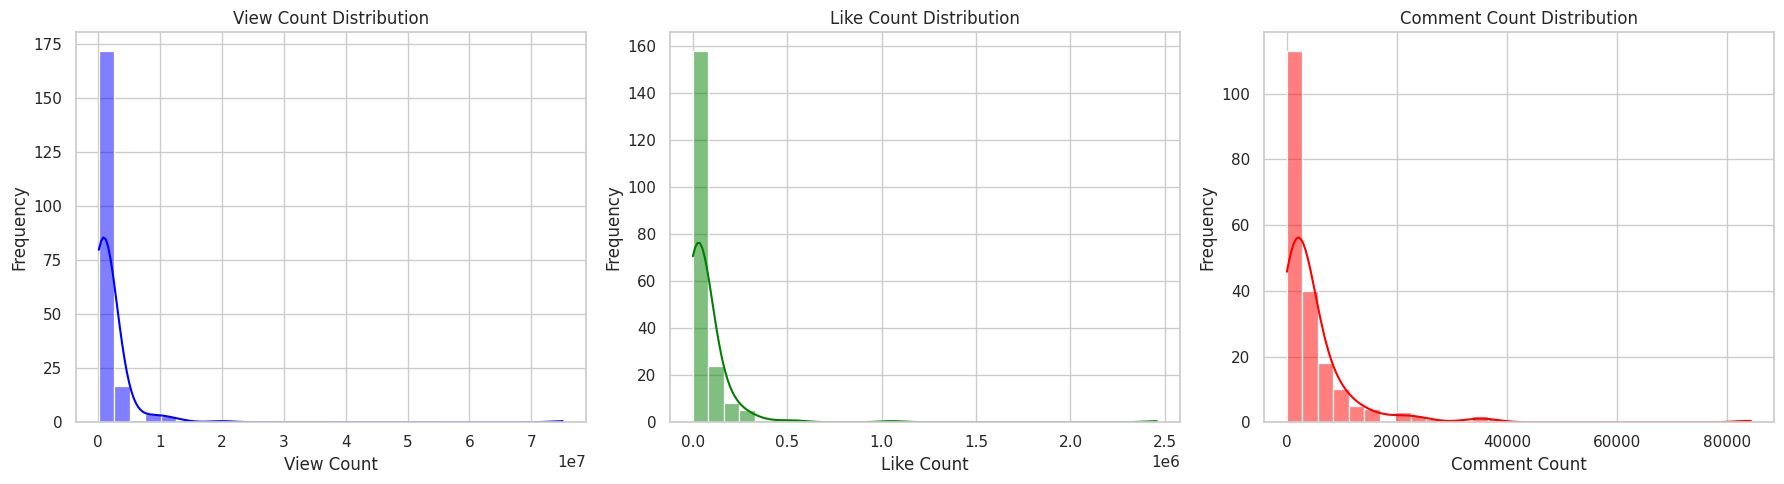

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# view count distribution
sns.histplot(trending_videos['view_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

# like count distribution
sns.histplot(trending_videos['like_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

# comment count distribution
sns.histplot(trending_videos['comment_count'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The view counts, Like counts and the comment count distributions are right skewed.

It can be observed that All three distributions indicate that there is a high concentration of videos with low engagement (views, likes, comments) and a small number of videos that dominate in terms of these metrics.



## Correlation Analysis between Views, Likes and Comments

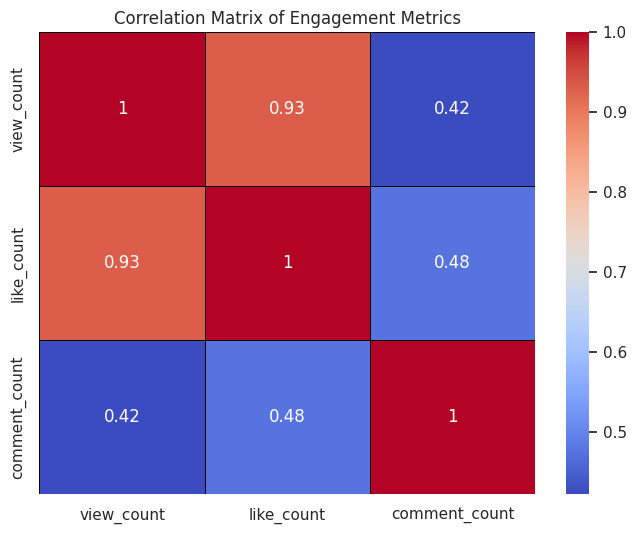

In [13]:
# correlation matrix
correlation_matrix = trending_videos[['view_count', 'like_count', 'comment_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

**0.931064 (view_count vs. like_count)**: This very high positive correlation indicates that as the view count increases, the like count also tends to increase significantly. This suggests that videos with higher views tend to receive more likes.

**0.422459 (view_count vs. comment_count)**: This moderate positive correlation suggests a weaker relationship between view count and comment count. While more views may lead to more comments, it isn't as strong as the relationship with likes.

**0.476422 (like_count vs. comment_count)**: This positive correlation indicates a moderate relationship between likes and comments. It implies that videos that receive more likes also tend to get more comments, though not as strongly as views and likes.

## Trending videos by category

<ipython-input-14-20e3e73c616f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-package

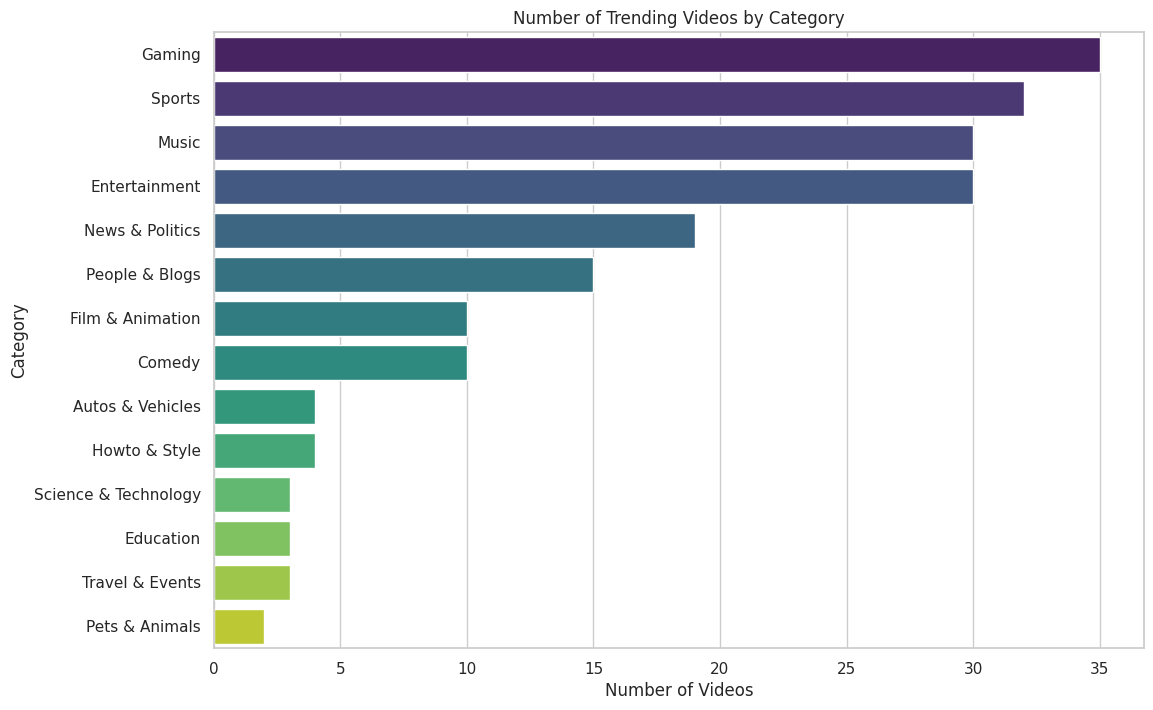

In [14]:
trending_videos['category_name'] = trending_videos['category_id'].map(category_mapping)

# Bar chart for category counts
plt.figure(figsize=(12, 8))
sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')
plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

The bar chart shows that the Gaming, Entertainment, Sports, and Music categories have the highest number of trending videos.

## Average Engagement Metrics

<ipython-input-15-6df855744d52>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:94

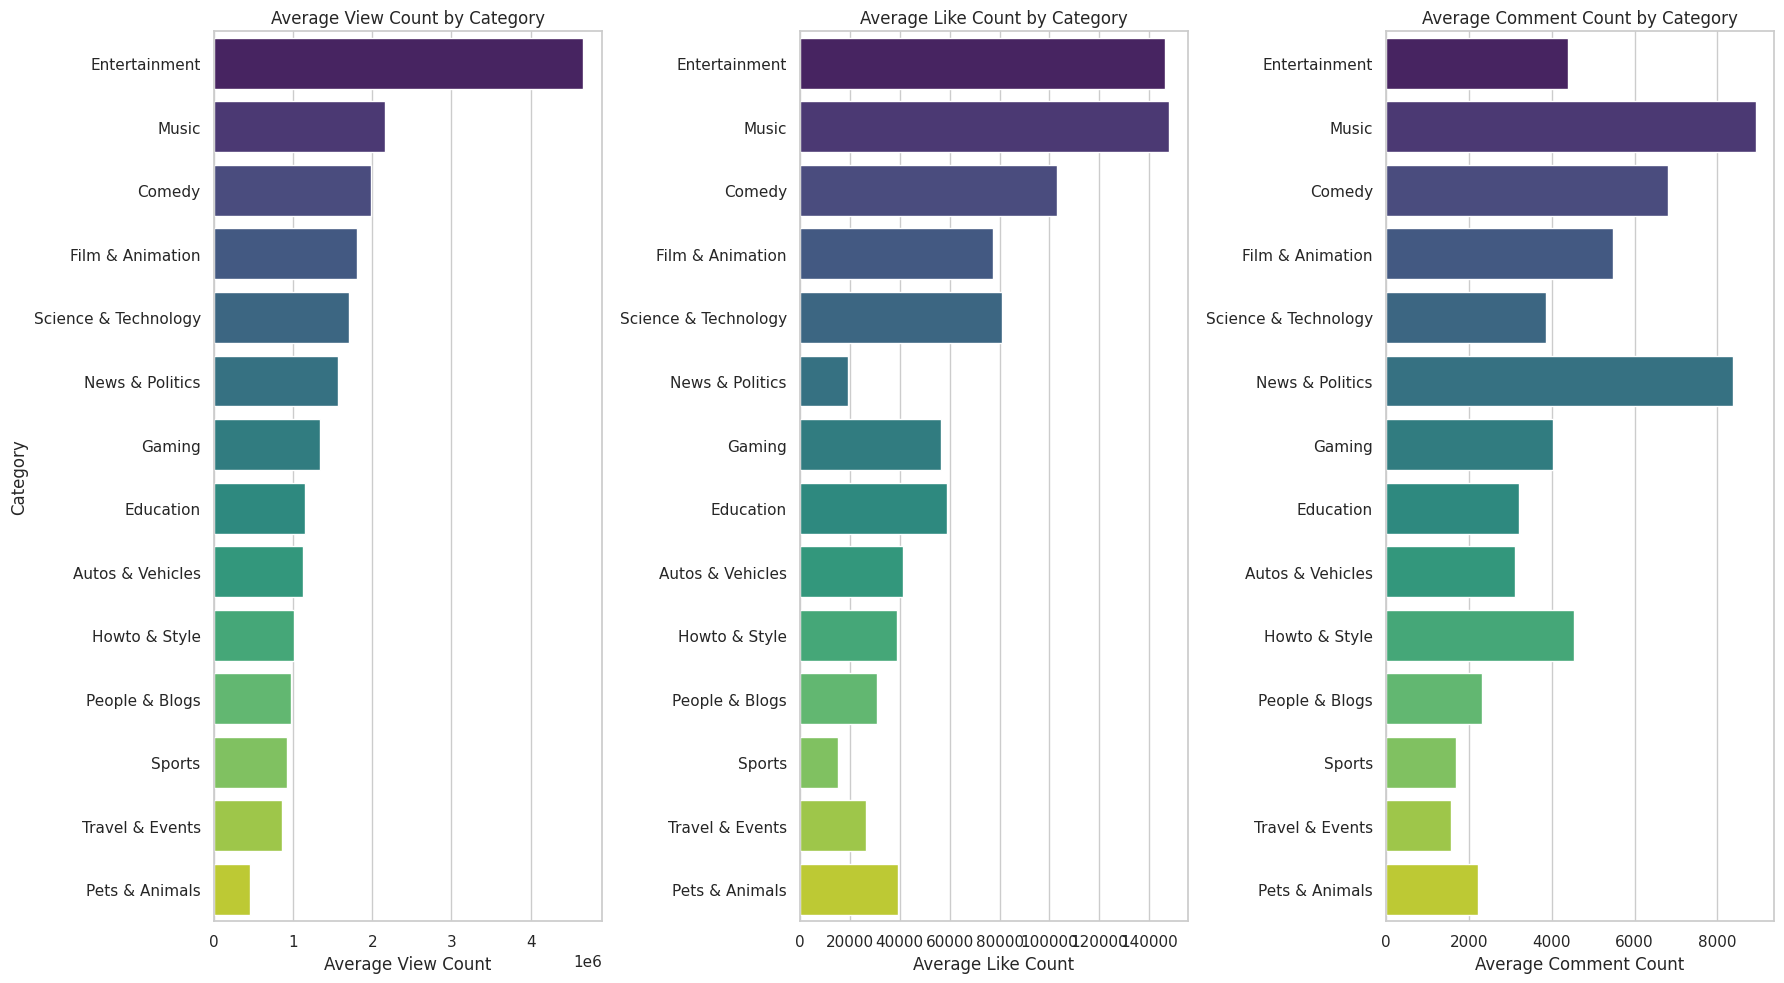

In [15]:
# average engagement metrics by category
category_engagement = trending_videos.groupby('category_name')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# view count by category
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')

# like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis')
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

Entertainment, Music and Comedy categories have the highest average view counts, likes, and comments. Film & Animation, Science and Technology also shows high engagement, especially in view counts and like counts.

## Analysing the content and duration of the videos

In [16]:
!pip install isodate
import isodate

# convert ISO 8601 duration to seconds
trending_videos['duration_seconds'] = trending_videos['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

trending_videos['duration_range'] = pd.cut(trending_videos['duration_seconds'], bins=[0, 300, 600, 1200, 3600, 7200], labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.4 MB/s eta 0:00:00


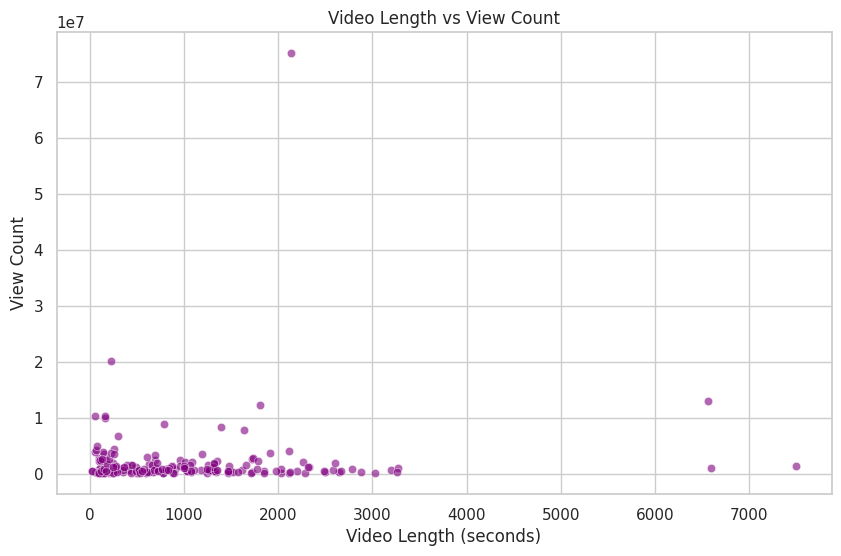

<ipython-input-17-071672337da8>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()
<ipython-input-17-071672337da8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

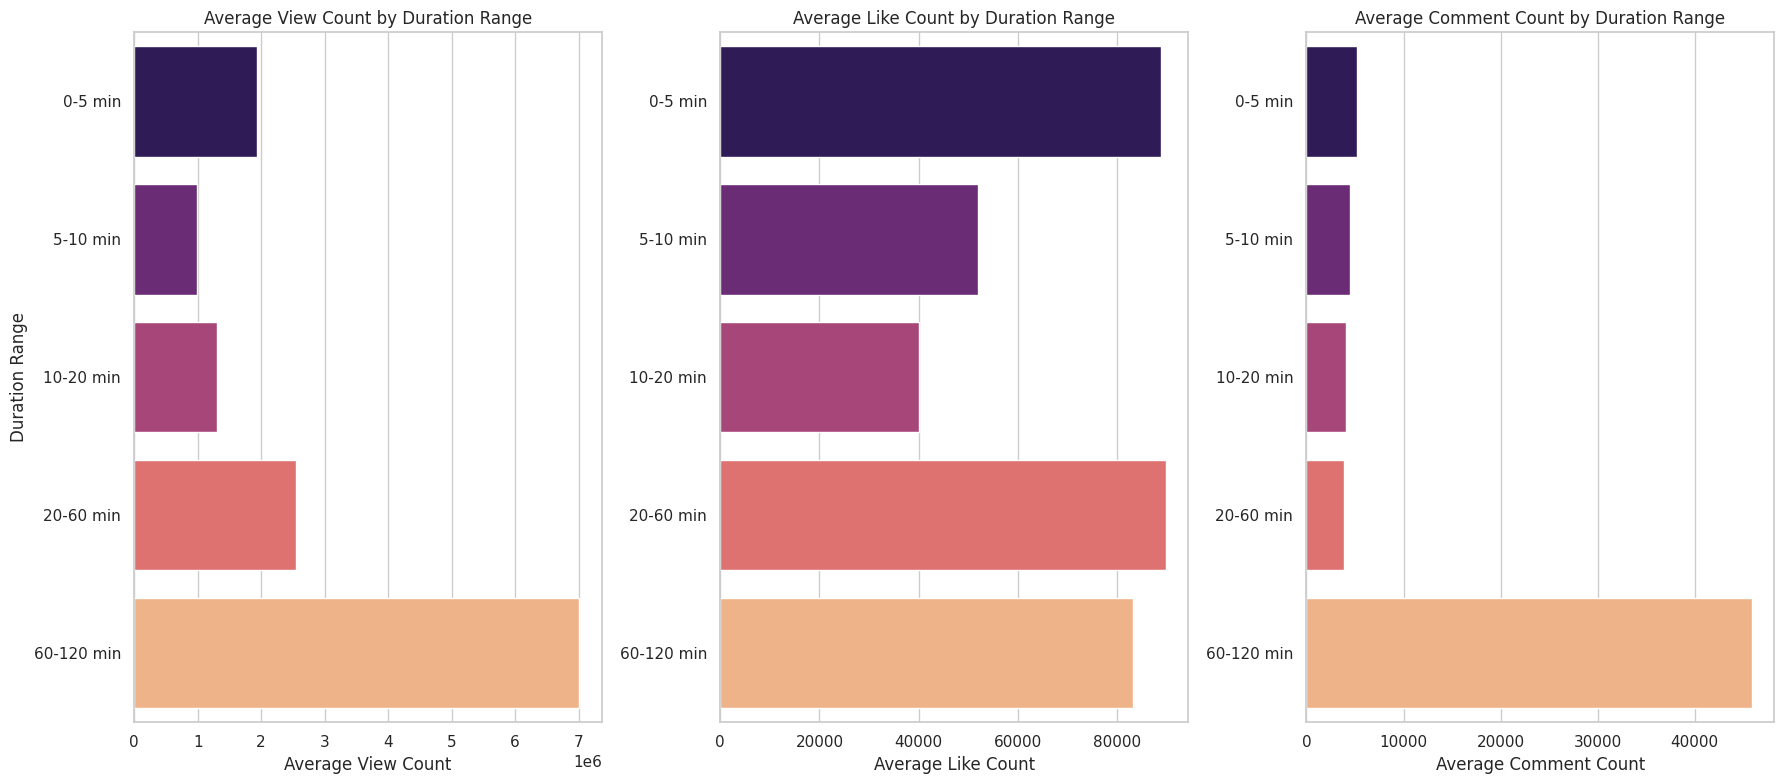

In [17]:
# scatter plot for video length vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='view_count', data=trending_videos, alpha=0.6, color='purple')
plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')
plt.show()

# bar chart for engagement metrics by duration range
length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# view count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
axes[0].set_title('Average View Count by Duration Range')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Duration Range')

# like count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['like_count'], ax=axes[1], palette='magma')
axes[1].set_title('Average Like Count by Duration Range')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['comment_count'], ax=axes[2], palette='magma')
axes[2].set_title('Average Comment Count by Duration Range')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()